## Simple Dielectric

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
freq = c/1.5e-6
w = 2*pi*freq

L_T = 80e-6
N_l = 50

wavelength = c/freq
dz1 = wavelength/N_l
N_T = round(L_T/dz1)+1
dz = L_T/N_T

z = np.arange(0,L_T,dz)

print("Frequency = ", round(freq*1e-12,2), "THz")
print("Wavelength = ", wavelength*1e6, "um")
print("N_T = ", N_T)
print("d_z = ", round(dz*1e9,2), "nm")

Frequency =  199.86 THz
Wavelength =  1.5 um
N_T =  2668
d_z =  29.99 nm


In [4]:
#Gaussian pulse parameters
bw = 50e12; #Aprox
tau = 1/bw;
def pulse(t,w,tau): 
    t0 = 2*tau;
    return np.sin(w*t)*np.exp(-((t-t0)/tau)**2)

In [5]:
S = 0.5
dt = S*dz/c
dt = min([S*dz/c, tau/20])
print("dt = ", dt*1e18, "as")

#Number of time steps
Total_Time = 0.5e-12;
STEPS = round(Total_Time/dt)
print("STEPS = ", STEPS)

dt =  50.00960947498532 as
STEPS =  9998


<IPython.core.display.Javascript object>


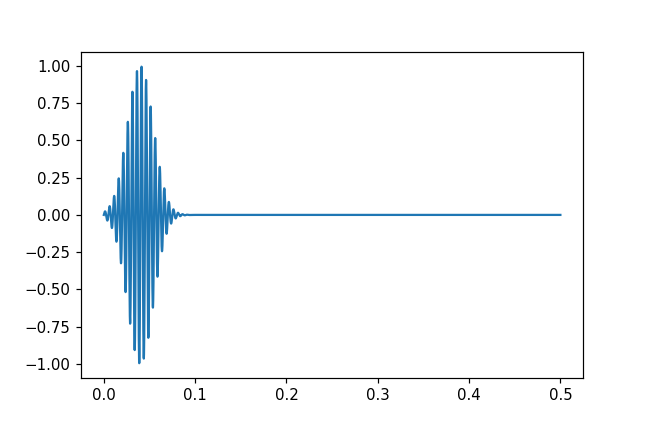

In [26]:
t = np.arange(0,STEPS*dt,dt)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t*1e12,pulse(t,w,tau))

<IPython.core.display.Javascript object>


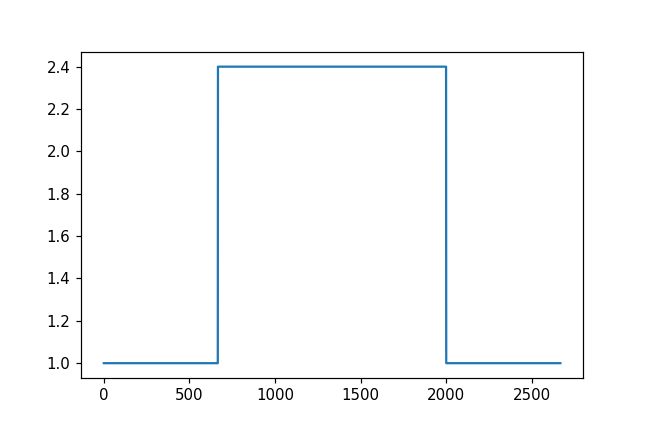

In [19]:
#Simple material model
erz = np.ones(N_T+1)
x1 = 20e-6
x2 = 60e-6
x1_k = round(x1/dz)
x2_k = round(x2/dz)
erz[x1_k:x2_k] = 2.4

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(erz)

In [20]:
#Location of source    
k_source = 50

#location of probe
k_probe = N_T-100
ey_probe = np.zeros(STEPS)

<IPython.core.display.Javascript object>


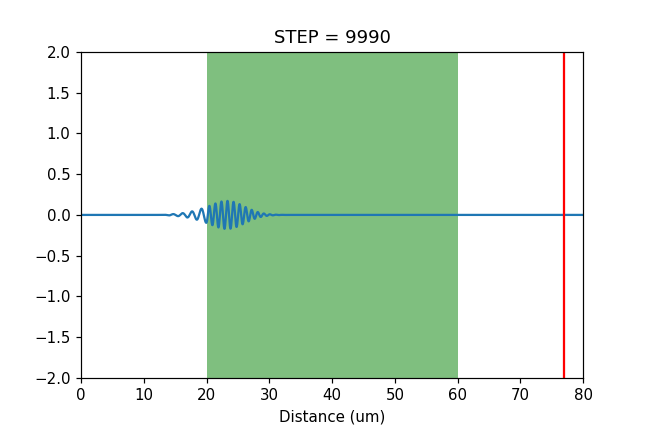

In [41]:
#Initialize fields
ey = np.zeros(N_T+1)
hx = np.zeros(N_T)

#Initialize boundary conditions
ey_0_2 = 0
ey_0_1 = 0
ey_N_2 = 0
ey_N_1 = 0

#Initialize dynamic figure
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

#Update factors
alpha_h = dt/(dz*mu_0)
alpha_e = dt/(dz*epsilon_0)

for n in range(0,STEPS):

    hx = hx +  alpha_h*(ey[1:]-ey[:N_T])
    ey[1:N_T] = ey[1:N_T] + alpha_e*(hx[1:] - hx[:N_T-1])/erz[1:N_T]

    #Apply source
    ey[k_source] = ey[k_source] + pulse(n*dt,w,tau)
    
    #Apply old boundary condition
    ey[0] = ey_0_2
    ey[N_T] = ey_N_2
    
    #Save boundary condition
    ey_0_2 = ey_0_1
    ey_0_1 = ey[1]
    ey_N_2 = ey_N_1
    ey_N_1 = ey[N_T-1]
    
    #Save field at probe location
    ey_probe[n] = ey[k_probe]
    
    if n%10==0:
        ax.clear()
        ax.plot(z*1e6,ey)
        ax.axes.set_ylim(-2,2)
        ax.axvspan(x1*1e6, x2*1e6, facecolor='g', alpha=0.5)
        ax.axvline(k_probe*dz*1e6, color='r')
        ax.axes.set_xlabel("Distance (um)")
        ax.margins(0)
        ax.set_title('STEP = %i' % n)
        fig.canvas.draw()
        time.sleep(0.001)
    
#plt.plot(ey_probe)

<IPython.core.display.Javascript object>


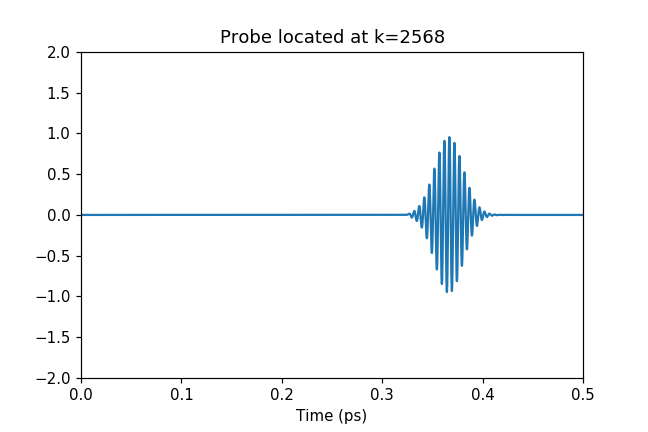

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.canvas.draw()
ax.plot(t*1e12,ey_probe)
ax.axes.set_ylim(-2,2)
ax.axes.set_xlabel('Time (ps)')
ax.margins(0)
ax.set_title('Probe located at k=%i' % k_probe)
fig.canvas.draw()